- In this cars dataset we have to predict the price of the cars by analysing the given features like width , horsepower , highway-mpg(etc) of the cars variables.
- This is not a clean dataset but we can do some EDA to handle missing values and outliers.
- There are some categorical columns which can be handled,
- Also We have to Scale down the values of the dataset therefore scaling is required.
- Finally applying some default Machine Learning Regression Models to find out which model gives the best score. 

In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset and checking the shape of the dataset

cars = pd.read_csv("cars.csv")
cars.shape

(205, 15)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
# Checking Descripive statistics

cars.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


#### EDA

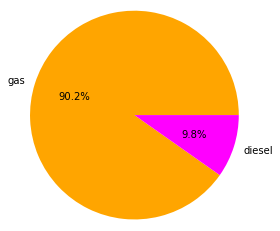

In [6]:
# Pie chart for fuel-type column for better visualization

plt.pie(cars["fuel-type"].value_counts(),
       labels=["gas","diesel"],
       colors=["orange","magenta"],
       autopct="%.1f%%",
       radius=1.2)
plt.show()

<AxesSubplot:>

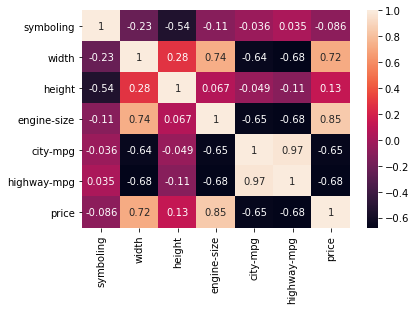

In [7]:
# Checking correlation between the columns

sns.heatmap(cars.corr() , annot=True)

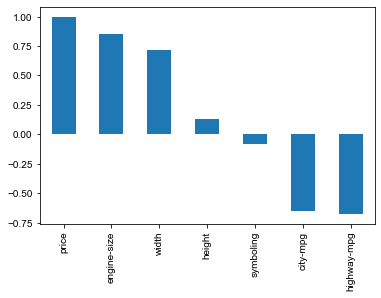

In [8]:
# Using Bar plot for better visualization

cars.corr()["price"].sort_values(ascending=False).plot(kind="bar")
sns.set_style("whitegrid")

In [9]:
cars["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [10]:
cars["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

#### Handling Missing Values

In [11]:
# Step1:- Replace to Nan
cars["normalized-losses"].replace("?",np.nan,inplace=True)

# Step2:- Change the datatpe
cars["normalized-losses"] = cars["normalized-losses"].astype(float)

# Step3:- get the mean 
n_mean = cars["normalized-losses"].mean()

# Step4:- Use fillna 
cars["normalized-losses"].fillna(n_mean,inplace=True)

In [12]:
cars["normalized-losses"].unique()

array([122., 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [13]:
# Step1:- Replace to Nan
cars["horsepower"].replace("?",np.nan,inplace=True)

# Step2:- Change the datatpe
cars["horsepower"] = cars["horsepower"].astype(float)

# Step3:- get the mean 
h_mean = cars["horsepower"].mean()

# Step4:- Use fillna 
cars["horsepower"].fillna(n_mean,inplace=True)

In [14]:
cars["horsepower"].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
       122.,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

In [15]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


### Handling Outliers

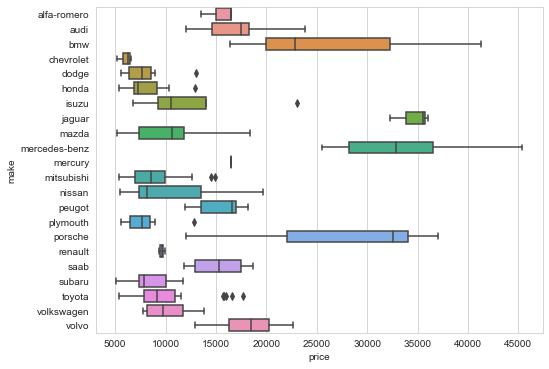

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

In [17]:
cars[(cars["make"]=="isuzu") & (cars["price"]>15000)]
cars.drop(45,inplace=True)

In [18]:
cars[(cars["make"]=="dodge") & (cars["price"]>10000)]
cars.drop(29,inplace=True)

In [19]:
cars[(cars["make"]=="plymouth") & (cars["price"]>10000)]
cars.drop(124,inplace=True)

In [20]:
cars[(cars["make"]=="toyota") & (cars["price"]>15000)]
cars.drop([172,178,179,180,181],inplace=True)

In [21]:
cars[(cars["make"]=="mitsubishi") & (cars["price"]>13000)]
cars.drop([83,84],inplace=True)

In [22]:
cars[(cars["make"]=="honda") & (cars["price"]>11000)]
cars.drop(41,inplace=True)

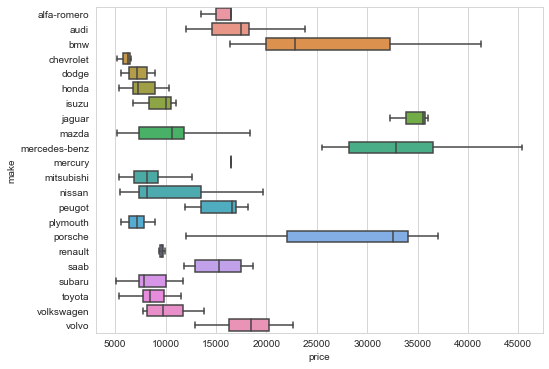

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=cars,x="price",y="make")
plt.show()

### Using Label Encoder for categorical Variables

In [24]:
cars_cat = cars.select_dtypes("object")

In [25]:
cars_num = cars.select_dtypes(["int64","float64"])

In [26]:
from sklearn.preprocessing import LabelEncoder

for i in cars_cat:
    le = LabelEncoder()
    cars_cat[i] = le.fit_transform(cars_cat[i])

In [27]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


### Merging Dataset

In [28]:
cars = pd.concat([cars_cat , cars_num],axis=1)
cars.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


---




---

In [29]:
# Splitting into independent variable and dependent variable

x = cars.drop("price",axis=1)
y = cars["price"]

In [30]:
# Applying train_test_split

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state= 1)

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
lr_ypred = lr.predict(Xtest)

In [32]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

print("MAE:- ",mean_absolute_error(ytest,lr_ypred))
print("MSE:- ",mean_squared_error(ytest,lr_ypred))
print("RMSE:- ",np.sqrt(mean_squared_error(ytest,lr_ypred)))
print()
print("Accuracy:- ",r2_score(ytest,lr_ypred))

MAE:-  2818.8264013230396
MSE:-  16593954.398813754
RMSE:-  4073.5677727041384

Accuracy:-  0.7981451322145632


In [33]:
# Coefficient of every columns

coeff = pd.DataFrame([cars.columns,lr.coef_]).T
coeff.rename(columns={0:"Features" , 1:"Coefficients"})

,Features,Coefficients
0,make,-132.933303
1,fuel-type,-1377.215153
2,body-style,45.991018
3,drive-wheels,1530.31252
4,engine-location,12518.180307
5,engine-type,-35.090067
6,symboling,463.648378
7,normalized-losses,-2.932118
8,width,708.731748
9,height,384.697325


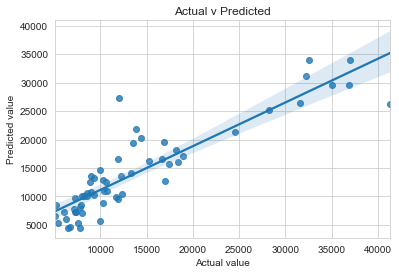

In [34]:
sns.regplot(ytest,lr_ypred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual v Predicted")
plt.grid(True)
plt.show()

### Lasso Regression

In [35]:
accuracy = []
for i in range(250,350,10):
    l1 = Lasso(alpha=i)
    l1.fit(Xtrain,ytrain)
    ypred_l1 = l1.predict(Xtest)
    
    train = l1.score(Xtrain,ytrain)
    test = l1.score(Xtest,ytest) 
    
    acc = r2_score(ytest,ypred_l1)
    accuracy.append(acc)
    
    #print(f"Alpha value {i},  Training Accuracy {train}, Testing Accuracy {test}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

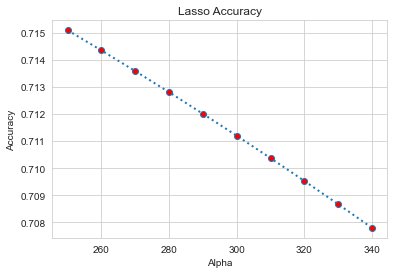

In [36]:
plt.plot(range(250,350,10) , accuracy, ls=":", lw = 2 , marker="o" , markerfacecolor="red")
plt.grid(True)
plt.title("Lasso Accuracy")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
sns.set_style("whitegrid")
plt.show()

In [37]:
lso = Lasso(alpha=200)
lso.fit(Xtrain,ytrain)
lso_ypred = lso.predict(Xtest)

print("Accuracy:- ",r2_score(ytest,lso_ypred))

<IPython.core.display.Javascript object>

Accuracy:-  0.7185800928911736


### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

In [39]:
accuracy = []
for i in range(0,40):
    l2 = Ridge(alpha=i)
    l2.fit(Xtrain,ytrain)
    ypred_l2 = l2.predict(Xtest)
    
    train = l2.score(Xtrain,ytrain)
    test = l2.score(Xtest,ytest) 

    acc = r2_score(ytest,ypred_l2)
    accuracy.append(acc)
    #print(f"Alpha value {i},  Training Accuracy {train}, Testing Accuracy {test}")

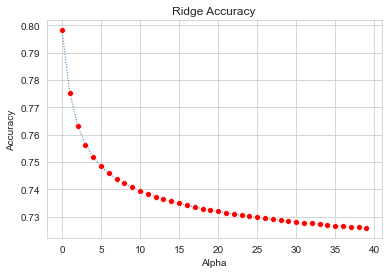

In [40]:
sns.lineplot(range(0 , 40) , accuracy, ls=":", lw = 1 , marker="o" , markerfacecolor="red")
sns.set_style("whitegrid")
plt.title("Ridge Accuracy")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [41]:
rdg = Ridge(alpha=1)
rdg.fit(Xtrain,ytrain)
ypred = rdg.predict(Xtest)

print("Accuracy :- ",r2_score(ytest,ypred))

Accuracy :-  0.7752685676623199


- __Ridge is Performing slightly Better than Lasso Because Ridge Penalise the Cost Function (mse) and the Cost Function is tends near to 0 not in 0__.
- **Lasso is also used for feature selection because the cost fucntion tends towards 0 and some point it will be at 0.**

In [42]:
# Lasso Coefficients
coeff = pd.DataFrame([cars.columns,lso.coef_]).T
coeff.rename(columns={0:"Features" , 1:"Coefficients"})

,Features,Coefficients
0,make,-105.108726
1,fuel-type,-0.0
2,body-style,-0.0
3,drive-wheels,834.364974
4,engine-location,0.0
5,engine-type,-0.0
6,symboling,264.71557
7,normalized-losses,1.967417
8,width,582.838574
9,height,413.2658


In [43]:
# Ridge Coefficients
coeff = pd.DataFrame([cars.columns,rdg.coef_]).T
coeff.rename(columns=
             {0:"Features" , 1:"Coefficients"})

,Features,Coefficients
0,make,-129.105555
1,fuel-type,-1407.912211
2,body-style,-13.494835
3,drive-wheels,1564.509007
4,engine-location,5564.922462
5,engine-type,16.076973
6,symboling,508.690702
7,normalized-losses,-4.751164
8,width,619.823067
9,height,428.765761


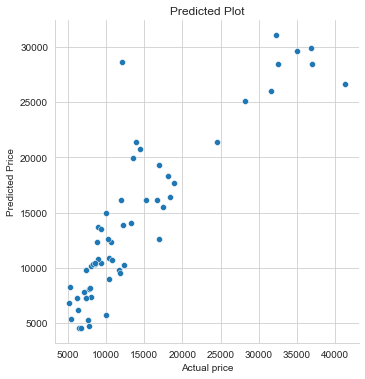

In [44]:
sns.relplot(ytest,ypred)
sns.set_style("whitegrid")
plt.title("Predicted Plot")
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.show()

### KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
accuracy = []
n = list(range(1,200,50))

for i in n:
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(Xtrain,ytrain)
    ypred_knn = knn.predict(Xtest)
    
    acc = r2_score(ytest,ypred_knn)
    accuracy.append(acc)

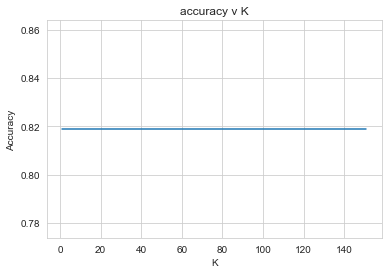

In [46]:
sns.lineplot(n,accuracy)
plt.title("accuracy v K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [47]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(Xtrain,ytrain)
ypred_knn = knn.predict(Xtest)

print("KNN_Accuracy:- ",r2_score(ytest,ypred_knn))

KNN_Accuracy:-  0.5696604123464355


- **KNN doesnt perfrom well because there are too many features and the Target Variable is overlapping**
- **KNN also need Feature Selection to perfrom well**

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear")
logreg.fit(Xtrain,ytrain)
ypred = logreg.predict(Xtest)


print("Accuracy:- ",r2_score(ytest,ypred))

Accuracy:-  0.7242272262634973


In [49]:
print("C                 Accuracy")
c = [.001, 0.01 , 0.1 , 1, 10]

for i in c:
    logreg = LogisticRegression(solver="liblinear",C=i)
    logreg.fit(Xtrain,ytrain)
    ypred = logreg.predict(Xtest)
    
    print(f"{i}       {r2_score(ytest,ypred)}")

C                 Accuracy
0.001       0.3934555551408966
0.01       0.5118611866042144
0.1       0.7821595921138953
1       0.7242272262634973
10       0.7189649172971053


In [50]:
logreg = LogisticRegression(solver="liblinear",C=0.1)
logreg.fit(Xtrain,ytrain)
ypred = logreg.predict(Xtest)

print("logreg_Accuracy:- ",r2_score(ytest,ypred))

logreg_Accuracy:-  0.7821595921138953


### SVM

In [51]:
from sklearn.svm import SVR
svm = SVR(kernel="linear")
svm.fit(Xtrain,ytrain)
ypred = svm.predict(Xtest)


print("SVM_Accuracy:- ",r2_score(ytest,ypred))

SVM_Accuracy:-  0.7151496584912362


In [52]:
print("C                 Accuracy")
c = [0.01 , 0.1 , 1, 10 , 100 , 1000]

for i in c:
    svm = SVR(kernel="linear",C=i)
    svm.fit(Xtrain,ytrain)
    ypred = svm.predict(Xtest)
    
    print(f"{i}       {r2_score(ytest,ypred)}")

C                 Accuracy
0.01       0.22094083422678712
0.1       0.6129140655920563
1       0.7151496584912362
10       0.7113852883189076
100       0.7124292341897898
1000       0.7260947900421602


In [53]:
svm = SVR(kernel="linear",C=1000)
svm.fit(Xtrain,ytrain)
ypred = svm.predict(Xtest)

print("SVM_Accuracy:- ",r2_score(ytest,ypred))

SVM_Accuracy:-  0.7260947900421602


- **SVM accuracy is good but its training time complexity is higher then rest of the algorithm**
- **SVM is slower when we have high dimensions**

In [54]:
def regression(model):
    model.fit(Xtrain,ytrain)
    ypred = model.predict(Xtest)
    
    print(f"{r2_score(ytest,ypred)}")

In [55]:
# Best Scores 

models = []

models.append(("Linear Regression: -",LinearRegression()))
models.append(("KNeigbors Regressor:- ",KNeighborsRegressor()))
models.append(("Lasso Regression: -",Lasso(alpha=200)))
models.append(("Ridge Regression: -",Ridge(alpha=1)))
models.append(("Logistic Regression : -",LogisticRegression(solver="liblinear",C=0.1)))
models.append(("SVM : -",SVR(kernel="linear",C=1000)))

for name,model in models:
    print()
    print(name)
    regression(model)

<IPython.core.display.Javascript object>


Linear Regression: -
0.7981451322145632

KNeigbors Regressor:- 
0.7469920298816214

Lasso Regression: -
0.7185800928911736

Ridge Regression: -
0.7752685676623199

Logistic Regression : -
0.7821595921138953

SVM : -
0.7260947900421602


- Linear Regression is having best accuracy (79%) because there is linearity between independent varibale and dependent variable
- Linear Regression perfroms well when the dataset is linearly seprable 
- Also there are some multi-colinarity between the columns we can drop that columns to get even more accurate result